# MODUL 2 EKUALISASI DAN SPESIFIKASI HISTOGRAM


Code dibawah merupakan beberapa library yang digunakan untuk melakukan import module. Import module ini berfungsi untuk menspesifikasikan module dari beberapa (library) yang digunakan dan 'as' digunakan sebagai penamaan alias pada module agar lebih mudah untuk melakukan import module. 

In [75]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np


Code dibawah digunakan untuk membaca gambar dari file 'senheScramble.jpg', 'kurumi.jpg', dan 'megumin.jpg' menggunakan fungsi plt.imread() dari library matplotlib.pyplot.

In [113]:
senheScramble = plt.imread('Res/senheScramble.jpg')
kurumi = plt.imread('Res/kurumi.jpg')
megumin = plt.imread('Res/megumin.jpg')

Code  dibawah digunakan untuk membuat sebuah gambar dengan ukuran 5x5 inci menggunakan fungsi plt.figure() dari library matplotlib.pyplot. Gambar yang ditampilkan adalah 'senheScramble', dengan pilihan colormap 'gray', yang dapat menampilkan gambar dalam skala abu-abu.

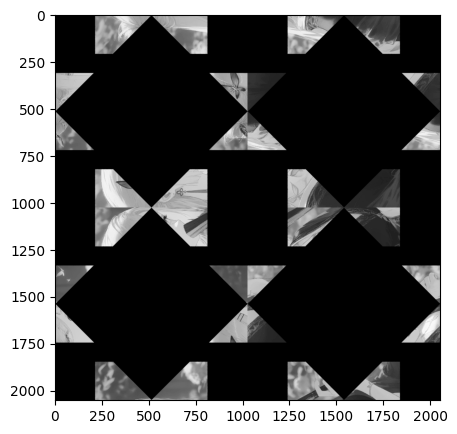

In [114]:
plt.figure(figsize=(5,5))
plt.imshow(senheScramble, cmap='gray')

# 1. Menyusun Gambar Tak Beraturan Menjadi Gambar Yang Utuh

Code dibawah berfungsi untuk membagi gambar 'senheScramble' menjadi 4 bagian yang sama besar, yaitu senheScramble1, senheScramble2, senheScramble3, dan senheScramble4, dengan menggunakan  library  array numpy. Setiap bagian kemudian ditampilkan dalam subplot berbeda dengan ukuran gambar 7x7 inci dan colormap 'gray'.

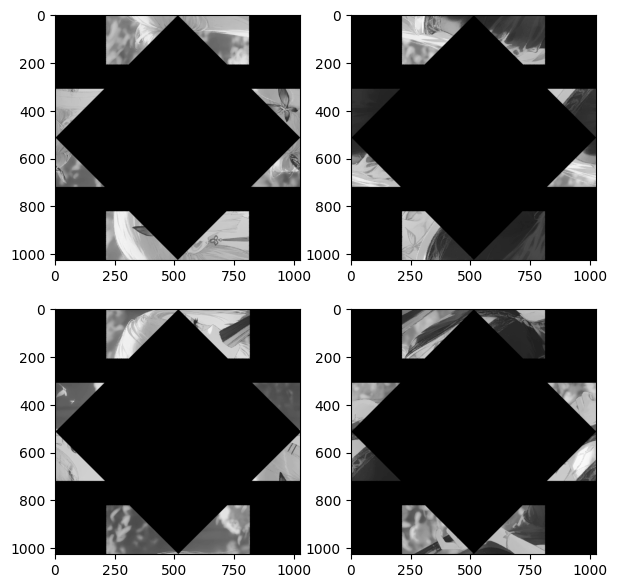

In [115]:
tinggi, lebar = senheScramble.shape[:2]
senheScramble1 = senheScramble[:tinggi//2, :lebar//2]
senheScramble2 = senheScramble[:tinggi//2, lebar//2:]
senheScramble3 = senheScramble[tinggi//2:, :lebar//2]
senheScramble4 = senheScramble[tinggi//2:, lebar//2:]

plt.figure(figsize=(7,7))
plt.subplot(221)
plt.imshow(senheScramble1, cmap='gray')
plt.subplot(222)
plt.imshow(senheScramble2, cmap='gray')
plt.subplot(223)
plt.imshow(senheScramble3, cmap='gray')
plt.subplot(224)
plt.imshow(senheScramble4, cmap='gray')


Dari code dibawah, fungsi transalasi menerima gambar (image) dan jarak pergeseran (geser) sebagai input. Dalam fungsi ini, gambar disalin ke imagenew, lalu terjadi pergeseran piksel pada bagian tertentu sesuai dengan nilai geser. Pada setiap iterasi, nilai piksel yang bukan antara 0 hingga 20 di biarkan, sementara piksel yang berada di luar rentang tersebut digeser sesuai dengan parameter geser. Hasil akhirnya adalah gambar baru yang telah mengalami translasi.

In [117]:
def transalasi(image, geser):
	tinggi, lebar = image.shape[:2]
	imagenew = np.zeros((tinggi, lebar)).astype(int)

	for y in range(0, 207):
		for x in range(200, 820):
			if not 0 <= image[y, x] <= 20:
				imagenew[y + geser , x] = image[y, x]
	
	for y in range(800, tinggi):
		for x in range(200, 820):
			if not 0 <= image[y, x] <= 20:
				imagenew[y - geser , x ] = image[y, x]
    
	for y in range(300, 720):
		for x in range(0, 210):
			if not 0 <= image[y, x] <= 20:
				imagenew[y, x + geser] = image[y, x]
	
	for y in range(300, 720):
		for x in range(820, lebar):
			if not 0 <= image[y, x] <= 20:
				imagenew[y, x - geser] = image[y, x]
    
	return imagenew

Fungsi rotate menerima gambar (image) dan sudut rotasi (angle) sebagai input. Gambar disalin ke 'citraRotated', lalu setiap piksel pada citra hasil rotasi dihitung ulang posisinya berdasarkan rumus transformasi geometri rotasi.

In [118]:
def rotate(image, angle):
	tinggi, lebar = image.shape[:2]
	
	citraRotated = np.zeros((tinggi, lebar)).astype(int) 
	theta = angle*np.pi/180
	
	center_x, center_y = lebar // 2, tinggi // 2
	for y in range(tinggi):
		for x in range(lebar):
			newX = int((x - center_x) * np.cos(theta) - (y - center_y) * np.sin(theta) + center_x)
			newY = int((x - center_x) * np.sin(theta) + (y - center_y) * np.cos(theta) + center_y)
		
			if 0 <= newX < lebar and 0 <= newY < tinggi:
			
				citraRotated[y,x] = image[newY,newX]
	return citraRotated

Fungsi 'crop' mengambil gambar sebagai input dan mengembalikan potongan gambar dari baris 214 hingga 811 dan kolom 307 hingga 717. Fungsi 'RGB2gray' mengonversi gambar RGB menjadi citra grayscale menggunakan rumus konversi yang diberikan, lalu mengembalikan citra grayscale yang dihasilkan.

In [119]:
def crop(image):
    return image[214:812, 307:718]

def RGB2gray(image):
    tinggi, lebar = image.shape[:2]
    grayImg = np.zeros((tinggi, lebar)).astype(np.uint8)
    for i in range(tinggi):
        for j in range(lebar):
            grayImg[i,j] = int(0.2989*image[i][j][0] + 0.5870*image[i][j][1] + 0.1140*image[i][j][2])
            
    return grayImg

Code dibawah mengaplikasikan serangkaian transformasi pada gambar-gambar senheScramble1, senheScramble2, senheScramble3, dan senheScramble4. Pertama-tama, dilakukan translasi pada setiap gambar dengan membagi tinggi gambar setengahnya. Kemudian, gambar-gambar tersebut diputar sebesar -90 derajat. Selanjutnya, dilakukan pemotongan pada setiap gambar dengan menggunakan fungsi 'crop'. Terakhir, keempat gambar digabungkan menjadi satu gambar 'senhe' dengan ukuran dua kali lipat dari setiap gambar sumbernya.

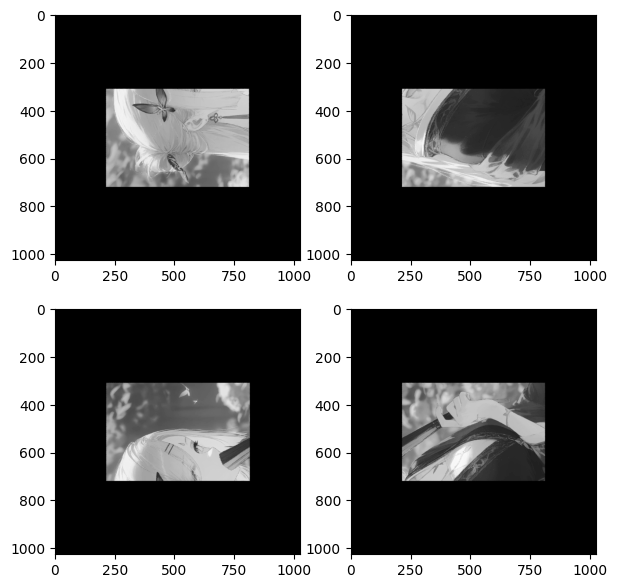

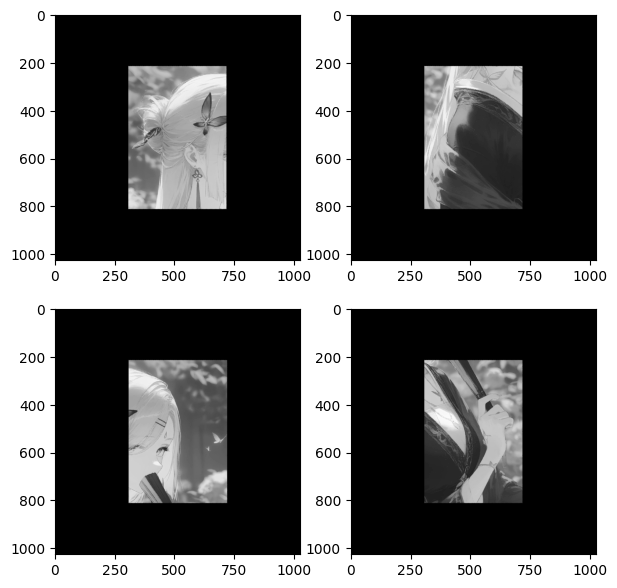

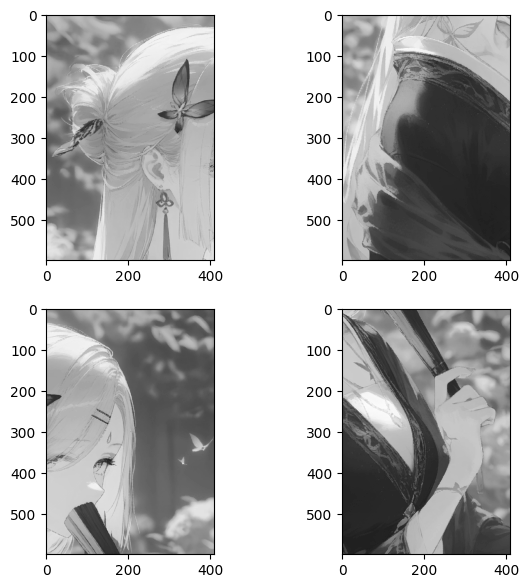

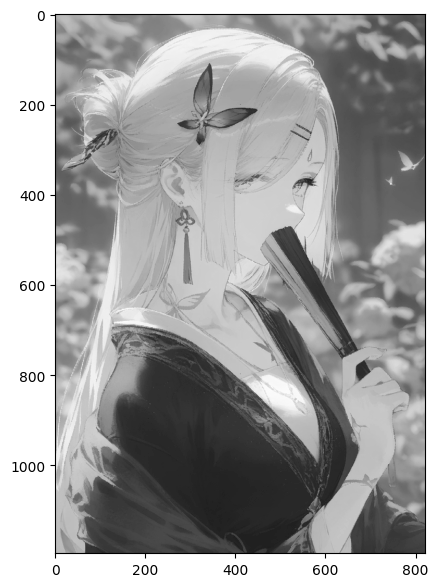

In [120]:
senheScramble1 = transalasi(senheScramble1, senheScramble1.shape[0]//2)
senheScramble2 = transalasi(senheScramble2, senheScramble1.shape[0]//2)
senheScramble3 = transalasi(senheScramble3, senheScramble1.shape[0]//2)
senheScramble4 = transalasi(senheScramble4, senheScramble1.shape[0]//2)

plt.figure(figsize=(7,7))
plt.subplot(221)
plt.imshow(senheScramble1, cmap='gray')
plt.subplot(222)
plt.imshow(senheScramble2, cmap='gray')
plt.subplot(223)
plt.imshow(senheScramble3, cmap='gray')
plt.subplot(224)
plt.imshow(senheScramble4, cmap='gray')

senheScramble1 = rotate(senheScramble1, -90)
senheScramble2 = rotate(senheScramble2, -90)
senheScramble3 = rotate(senheScramble3, -90)
senheScramble4 = rotate(senheScramble4, -90)

plt.figure(figsize=(7,7))
plt.subplot(221)
plt.imshow(senheScramble1, cmap='gray')
plt.subplot(222)
plt.imshow(senheScramble2, cmap='gray')
plt.subplot(223)
plt.imshow(senheScramble3, cmap='gray')
plt.subplot(224)
plt.imshow(senheScramble4, cmap='gray')

senheScramble1 = crop(senheScramble1)
senheScramble2 = crop(senheScramble2)
senheScramble3 = crop(senheScramble3)
senheScramble4 = crop(senheScramble4)

plt.figure(figsize=(7,7))
plt.subplot(221)
plt.imshow(senheScramble1, cmap='gray')
plt.subplot(222)
plt.imshow(senheScramble2, cmap='gray')
plt.subplot(223)
plt.imshow(senheScramble3, cmap='gray')
plt.subplot(224)
plt.imshow(senheScramble4, cmap='gray')

senhe = np.zeros((senheScramble1.shape[0]*2, senheScramble1.shape[1]*2)).astype(np.uint8)
senhe[:senheScramble1.shape[0], :senheScramble1.shape[1]] = senheScramble1
senhe[:senheScramble3.shape[0], senheScramble3.shape[1]:] = senheScramble3
senhe[senheScramble2.shape[0]:, :senheScramble2.shape[1]] = senheScramble2
senhe[senheScramble4.shape[0]:, senheScramble4.shape[1]:] = senheScramble4

plt.figure(figsize=(7,7))
plt.imshow(senhe, cmap='gray')


## 2. Membuat Histogram dan Histogram Probabilitas Citra Shenhe

Fungsi 'intensitasDerajatCitra' menerima gambar grayscale (image) sebagai input dan mengembalikan array yang berisi jumlah piksel untuk setiap tingkat intensitas grayscale (0 hingga 255). Dan array 'jumlahPerGray' diisi dengan jumlah piksel untuk setiap nilai grayscale yang mungkin.

In [121]:
def intensitasDerajatCitra(image):
   
	tinggi,lebar = image.shape
	
	jumlahPerGray = np.zeros(256).astype(int)
	
	for i in range(tinggi):
		for j in range(lebar):
			jumlahPerGray[image[i, j]]+=1

	return jumlahPerGray

Code dibawah berfungsi untuk menghitung distribusi intensitas grayscale dari gambar 'senhe' menggunakan fungsi 'intensitasDerajatCitra'. Kemudian, distribusi grayscale tersebut ditampilkan dalam dua subplot: subplot pertama menunjukkan distribusi absolut jumlah piksel untuk setiap nilai grayscale, sedangkan subplot kedua menampilkan probabilitas distribusi grayscale dengan membagi jumlah piksel untuk setiap nilai grayscale dengan jumlah total piksel. Subplot pertama, yaitu "Distribusi Grayscale" dengan sumbu x yang menunjukkan nilai gray dan sumbu y yang menunjukkan jumlah, dan Subplot kedua, yaitu "Probabilitas Distribusi Grayscale" dengan sumbu x yang sama dan sumbu y yang menunjukkan probabilitas.

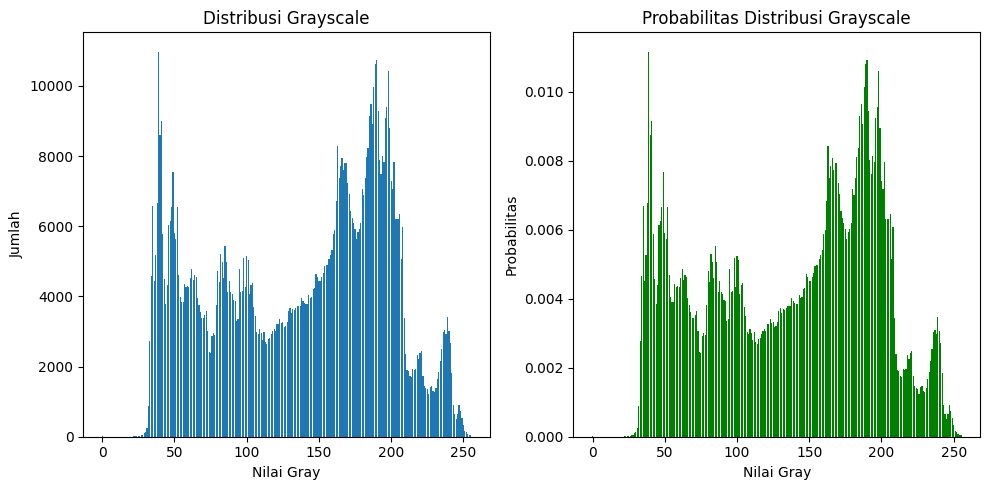

In [122]:

grayValue = [i for i in range(256)]
intensitasDerajatSenhe = intensitasDerajatCitra(senhe)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Distribusi Grayscale')
axs[0].set_xlabel('Nilai Gray')
axs[0].set_ylabel('Jumlah')
axs[0].bar(grayValue, intensitasDerajatSenhe)

axs[1].set_title('Probabilitas Distribusi Grayscale')
axs[1].set_xlabel('Nilai Gray')
axs[1].set_ylabel('Probabilitas')
axs[1].bar(grayValue, intensitasDerajatSenhe / intensitasDerajatSenhe.sum(), color='green')

plt.tight_layout()
plt.show()

Fungsi 'findTarget' menerima array distribusi intensitas grayscale (intensitasDerajat) dan gambar (image) sebagai input. Didalamnya  dilakukan perhitungan distribusi kumulatif untuk setiap nilai grayscale. Kemudian, distribusi kumulatif tersebut dinormalisasi dengan mengalikan dengan 255 dan dibagi dengan jumlah total piksel dalam gambar. Hasil dari normalisasi tersebut kemudian dibulatkan dan dikembalikan sebagai array target untuk proses transformasi citra.

## 3. Ekualisasi Citra Shenhe dan Menampilkan Histogram Perbandingannya 

In [123]:
def findTarget(intensitasDerajat, image):
	tinggi, lebar = image.shape
	
	distKumulatif = np.zeros(256).astype(float)
	
	for i in range(256):
		distKumulatif[i] = np.sum(intensitasDerajat[0:i+1])

	
	normalisasiDistCum = (distKumulatif*255)/(tinggi*lebar)
	normalisasiDistCum = np.round(normalisasiDistCum).astype(int)

	return normalisasiDistCum

Code dibawah berfungsi untuk melakukan ekualisasi histogram pada gambar 'senhe' menggunakan fungsi 'findTarget' untuk mendapatkan target distribusi kumulatif yang dinormalisasi. Kemudian, hasil normalisasi digunakan untuk memetakan kembali intensitas piksel pada gambar 'senhe'. Gambar asli dan hasil ekualisasinya ditampilkan dalam subplot untuk perbandingan sebelum dan setelah ekualisasi histogram.

(-0.5, 821.5, 1195.5, -0.5)

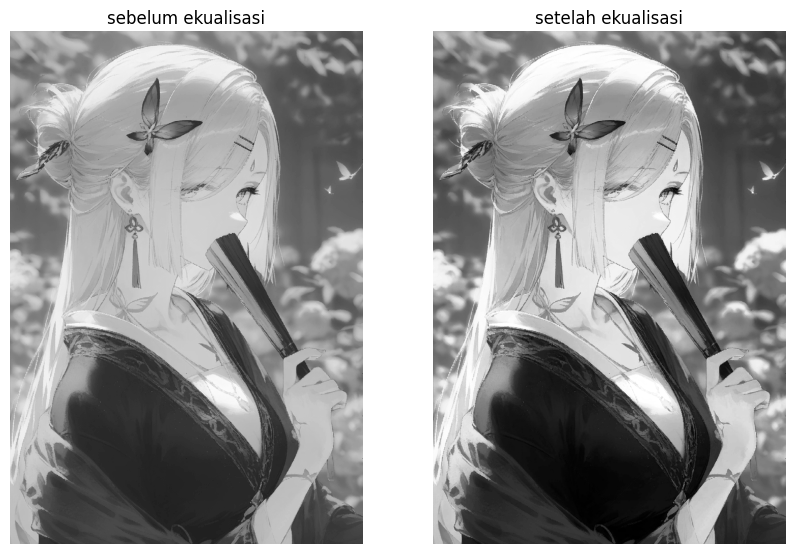

In [124]:
normalisasiTargetSenhe = findTarget(intensitasDerajatSenhe, senhe)

tinggi, lebar = senhe.shape
ekualisasiSenhe = np.zeros((tinggi, lebar)).astype(np.uint8)
for i in range(tinggi):
	for j in range(lebar):
		ekualisasiSenhe[i,j] = normalisasiTargetSenhe[senhe[i,j]]

plt.figure(figsize=(10, 10)) 
plt.subplot(1, 2, 1)  
plt.imshow(senhe, cmap='gray')
plt.title('sebelum ekualisasi')
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.imshow(ekualisasiSenhe , cmap='gray')
plt.title('setelah ekualisasi')
plt.axis('off')


Code dibawah berfungsi untuk enampilkan histogram dalam bentuk jumlah per grayscale sebelum dan setelah proses ekualisasi histogram. Dimana, subplot pertama menunjukkan histogram sebelum ekualisasi, sedangkan subplot kedua menampilkan histogram setelah ekualisasi. Kedua subplot tersebut, sumbu x enunjukkan nilai gray dan sumbu y menunjukkan jumlah piksel dengan intensitas tersebut.

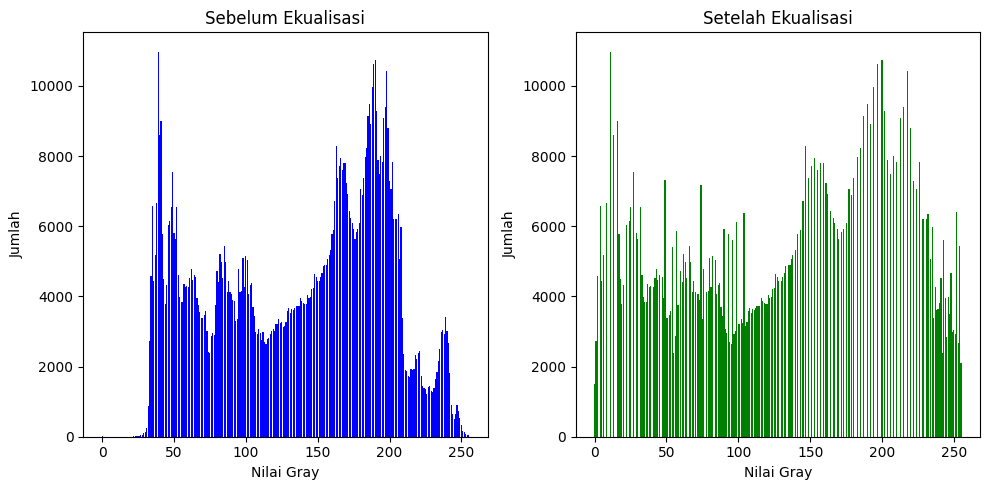

In [125]:
intensitasDerajatSenheEkual = intensitasDerajatCitra(ekualisasiSenhe)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Sebelum Ekualisasi')
axs[0].set_xlabel('Nilai Gray')
axs[0].set_ylabel('Jumlah')
axs[0].bar(grayValue, intensitasDerajatSenhe, color='blue')

axs[1].set_title('Setelah Ekualisasi')
axs[1].set_xlabel('Nilai Gray')
axs[1].set_ylabel('Jumlah')
axs[1].bar(grayValue, intensitasDerajatSenheEkual, color='green')

plt.tight_layout()
plt.show()

## 4. Melakukan spesifikasi Histogram Shenhe dengan Target Histogram Kurumi dan Megumin

Code dibawah digunakan untuk mengonversi gambar 'kurumi' dan 'megumin' menjadi citra grayscale menggunakan fungsi 'RGB2gray'. 
Kemudian, distribusi intensitas grayscale dari kedua gambar tersebut dihitung menggunakan fungsi intensitasDerajatCitra. 
Selanjutnya, fungsi 'findTarget' digunakan untuk mendapatkan target distribusi kumulatif yang dinormalisasi untuk kedua gambar tersebut. Hasil normalisasi kemudian akan digunakan untuk ekualisasi histogram pada kedua gambar.

In [126]:
kurumiGray = RGB2gray(kurumi)
meguminGray = RGB2gray(megumin)

intensitasDerajatKurumi = intensitasDerajatCitra(kurumiGray)
intensitasDerajatMegumin = intensitasDerajatCitra(meguminGray)

normalisasiTargetKurumi = findTarget(intensitasDerajatKurumi, kurumiGray)
normalisasiTargetMegumin = findTarget(intensitasDerajatMegumin, meguminGray)

Fungsi 'findMinimumTarget' menerima dua parameter, yaitu  'normalisasiCitraOriginal' yang berisi distribusi intensitas kumulatif yang dinormalisasi dari citra asli, dan 'normalisasiCitraTarget' yang berisi distribusi intensitas kumulatif yang dinormalisasi dari citra target. Kemudian dilakukan perbandingan antara setiap nilai distribusi kumulatif citra asli dengan setiap nilai distribusi kumulatif citra target untuk menemukan nilai minimum dari perbedaan 'abs' (absolut). Indeks dari nilai minimum tersebut akan disimpan. Hasilnya adalah array yang berisi indeks dari nilai terdekat pada distribusi kumulatif citra target untuk setiap nilai distribusi kumulatif citra asli.

In [127]:
def findMinimumTarget(normalisasiCitraOriginal, normalisasiCitraTarget):
    minAtIndex = np.zeros(256).astype(int)
    for i in range(255):
		
        min=256
        for j in range(255):
            newMin=abs(normalisasiCitraOriginal[i]-normalisasiCitraTarget[j])
			
            if min>newMin:
                min=newMin
                minAtIndex[i]=j

    return minAtIndex


Code dibawah menggunakan fungsi 'findMinimumTarget' untuk menemukan nilai minimum dari perbedaan absolut antara distribusi kumulatif yang dinormalisasi dari citra 'senhe' (sebagai citra referensi) dengan distribusi kumulatif yang dinormalisasi dari citra 'kurumi' dan 'megumin'. 

In [128]:
minKurumiAtIndex = findMinimumTarget(normalisasiTargetSenhe, normalisasiTargetKurumi)
minMeguminAtIndex = findMinimumTarget(normalisasiTargetSenhe, normalisasiTargetMegumin)

Code dibawah digunakan untuk membuat citra kosong 'spesifikasiSenhe2Kurumi' dan 'spesifikasiSenhe2Megumin' dengan ukuran yang sama dengan gambar 'senhe' untuk menyimpan citra baru hasil spesifikasi. Dilakukan perulangan untuk memetakan kembali setiap piksel pada gambar asli 'senhe' ke citra baru menggunakan nilai minimum yang telah dihitung sebelumnya untuk setiap citra target, yaitu 'kurumi' dan 'megumin'. Kemudian hasilnya berupa dua gambar baru yang telah disesuaikan distribusi kumulatifnya dengan citra 'kurumi' dan 'megumin'

(-0.5, 821.5, 1195.5, -0.5)

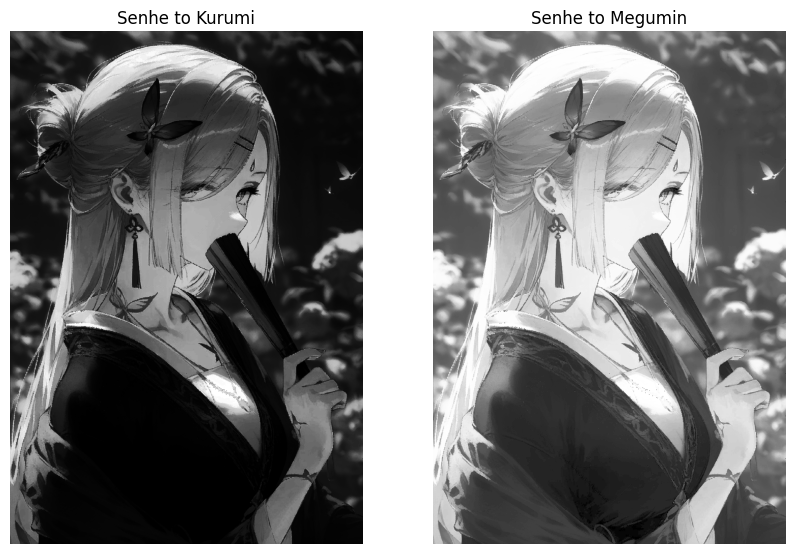

In [129]:
spesifikasiSenhe2Kurumi = np.zeros(senhe.shape).astype(int)
spesifikasiSenhe2Megumin = np.zeros(senhe.shape).astype(int)

for i in range(tinggi):
    for j in range(lebar):
        spesifikasiSenhe2Kurumi[i,j]=minKurumiAtIndex[senhe[i,j]]
        spesifikasiSenhe2Megumin[i,j]=minMeguminAtIndex[senhe[i,j]]

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(spesifikasiSenhe2Kurumi, cmap='gray')
plt.title('Senhe to Kurumi')
plt.axis('off')
plt.subplot(1, 2, 2)  
plt.imshow(spesifikasiSenhe2Megumin, cmap='gray')
plt.title('Senhe to Megumin')
plt.axis('off')
